# Лабораторная работа 3

## Сингулярное разложение и его приложения

Напомним, что сингулярным разложением (SVD, Singular value decomposition) матрицы $A$ размера $m\times n$ называется представление

$$A = U\Sigma V^T,$$

где $U$ — ортогональная матрица размера $m\times m$, $V$ — ортогональная матрица размера $n\times n$, $\Sigma = \mathrm{diag}(\sigma_1,\sigma_2,\sigma_3,\ldots)$ — диагональная матрица размера $m\times n$, в которой $\sigma_1\geqslant\sigma_2\geqslant\ldots\geqslant0$.

На самом деле, требование, чтобы матрицы $U$ и $V$ были квадратными, избыточно. *Усечённым сингулярным разложением* мы будем называть разложение

$$A = U\Sigma V^T,$$

где $U$ — ортогональная матрица размера $m\times k$, $V^T$ — ортогональная матрица размера $k\times n$, $\Sigma$ — диагональная матрица размера $k\times k$, причём $k = \min(m,n)$. Далее мы будем работать исключительно с усечённым разложением.

### Сжатие данных с помощью SVD = построение низкорангового приближения

Введём *норму Фробениуса* матрицы как

$$||A||_{frob} = \sqrt{\mathrm{tr}{A^TA}} = \sqrt{\sum\limits_{i,j}a^2_{i,j}}$$

Иными словами, это обычное евклидово расстояние на пространстве, которое получается, если все матрицы вытянуть в длинные векторы.

Зададимся вопросом: как найти матрицу $A_{r}$ ранга $r$, наименее отличающуюся от $A$ по норме Фробениуса (то есть для которой норма разности $||A - A_{r}||_{frob}$ минимальна). Оказывается, это можно сделать с помощью сингулярного разложения:

**Теорема.** Пусть $\Sigma_{r}$ — это матрица, полученная из $\Sigma$ заменой диагональных элементов $\sigma_{i}$ ($i > r$) нулями, тогда $A_{r} = U\Sigma_{r}V^T$.

Это можно переписать и в более экономичном виде. Если

$$A = \underbrace{
\begin{pmatrix}
u_{11} & \ldots & u_{1k}\\
\vdots & & \vdots\\
u_{m1} & \ldots & u_{mk}
\end{pmatrix}}_{=U}\cdot\underbrace{{
\begin{pmatrix}
\sigma_{1} & &\\
 & \sigma_{2} & \\
 & & \ddots
\end{pmatrix}}
}_{=\Sigma}\cdot \underbrace{
\begin{pmatrix}
v_{11} & \ldots & v_{n1}\\
\vdots & & \vdots\\
v_{1k} & \ldots & v_{nk}
\end{pmatrix}}_{=V^T}$$

то

$$A_{r} = \underbrace{
\begin{pmatrix}
u_{11} & \ldots & u_{1r}\\
\vdots & & \vdots\\
u_{m1} & \ldots & u_{mr}
\end{pmatrix}}_{=U_r}\cdot\underbrace{{
\begin{pmatrix}
\sigma_{1} & &\\
 & \ddots & \\
 & & \sigma_{r}
\end{pmatrix}}
}_{=\Sigma_r}\cdot \underbrace{
\begin{pmatrix}
v_{11} & \ldots & v_{n1}\\
\vdots & & \vdots\\
v_{1r} & \ldots & v_{nr}
\end{pmatrix}}_{=V^T_r}$$

При этом

$$||A - A_{r}||_{frob} = \sqrt{\sum\limits_{i\geqslant r+1} \sigma_{i}^2}$$

Если сингулярные значения матрицы падают достаточно быстро (а в реальных задачах часто бывает именно так), то норма разности будет малой при сравнительно небольшом значении $r$.

На хранение исходной матрицы нам требовалось $m\times n$ памяти. Теперь же, если мы будем хранить отдельно $U_r$, $V_r$ и диагональные элементы $\Sigma_r$, затраты памяти составят $mr + nr + r = r(m + n + 1)$.

**Разложение на компоненты ранга 1**

Обозначим через $u_1,\ldots, u_k$ столбцы матрицы $U$, а через $v_1, \ldots, v_k$ столбцы матрицы $V$. Тогда имеет место равенство

$$A = u_1\sigma_{1}v_1^T + u_2\sigma_{2}v_2^T + u_3\sigma_{3}v_3^T + \ldots$$

Матрицу $u_k\sigma_{k}v_k^T = \sigma_{k}u_kv_k^T$ мы будем называть $k$-й компонентой ранга 1 матрицы $A$. Отметим, что слагаемые в этой сумме ортогональны относительно скалярного произведения $(X, Y) = \mathrm{tr}(X^TY)$ (порождающего норму Фробениуса).

Как нетрудно заметить,

$$A_{r} = \sigma_{1}u_1v_1^T + \sigma_{2}u_2v_2^T + \ldots + \sigma_{r}u_rv_r^T$$

**Технические детали (SVD в Питоне)**

Есть несколько способов сделать в Питоне сингулярное разложение; мы пока предлагаем Вам использовать

`import scipy.linalg as sla`

`U, S, Vt = sla.svd(X, full_matrices=False)`

Для ознакомления с особенностями этой функции рекомендуем обратиться к [документации](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.svd.html) (в частности, обратите внимание на то, какие именно объекты она возвращает).

### Правила оформления графиков

При работе с данными часто неудобно делать какие-то выводы, если смотреть на таблицу и числа в частности, поэтому важно уметь визуализировать данные. 

У matplotlib, конечно же, есть [документация](https://matplotlib.org/users/index.html) с большим количеством [примеров](https://matplotlib.org/examples/), но для начала достаточно знать про несколько основных типов графиков:
- plot — обычный поточечный график, которым можно изображать кривые или отдельные точки;
- hist — гистограмма, показывающая распределение некоторой величины;
- scatter — график, показывающий взаимосвязь двух величин;
- bar — столбцовый график, показывающий взаимосвязь количественной величины от категориальной.

Ещё одна билиотека для визуализации: [seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html). Это настройка над matplotlib, иногда удобнее и красивее делать визуализации через неё. 

Не забывайте про базовые принципы построения приличных графиков:
- оси должны быть подписаны, причём не слишком мелко;
- у графика должно быть название;
- если изображено несколько графиков, то необходима поясняющая легенда;
- для точек из разных выборок, необходимо использовать разные цвета;
- все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном);
- размер графика должен быть таким, чтобы по нему несложно было сделать необходимые выводы о данных;
- если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах).

Помните, что проверяющий имеет право снизить оценку за неопрятные графики.

### Оценивание

Обратите внимание, что в каждом разделе есть задания на написания кода и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если Вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то в подавляющем большинстве случаев баллы за такое выставлены не будут.

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-linregr-Username.ipynb, где Username — Ваша фамилия.

### Задание 1. Сжатие данных с помощью SVD

Загрузите выложенную на странице курса фотографию.

In [1]:
import numpy as np
from skimage.io import imread

img = imread(r'chain_small.jpg')
img = img.mean(axis=2) # это матрица из интенсивностей серого цвета; её уже можно подвергать SVD

Нарисуйте картинку:

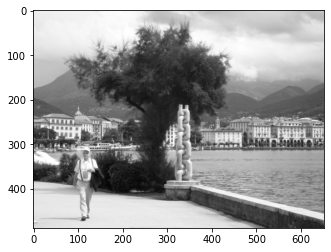

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

imgplot = plt.imshow(img, cmap='gray')

Постройте сингулярное разложение этой матрицы.

In [3]:
from numpy.linalg import svd

U, S, VT = svd(img, full_matrices=False)

**1. [0.1 балла]** Нарисуйте график диагональных элементов матрицы $\Sigma$:

Text(0.5, 1.0, 'График')

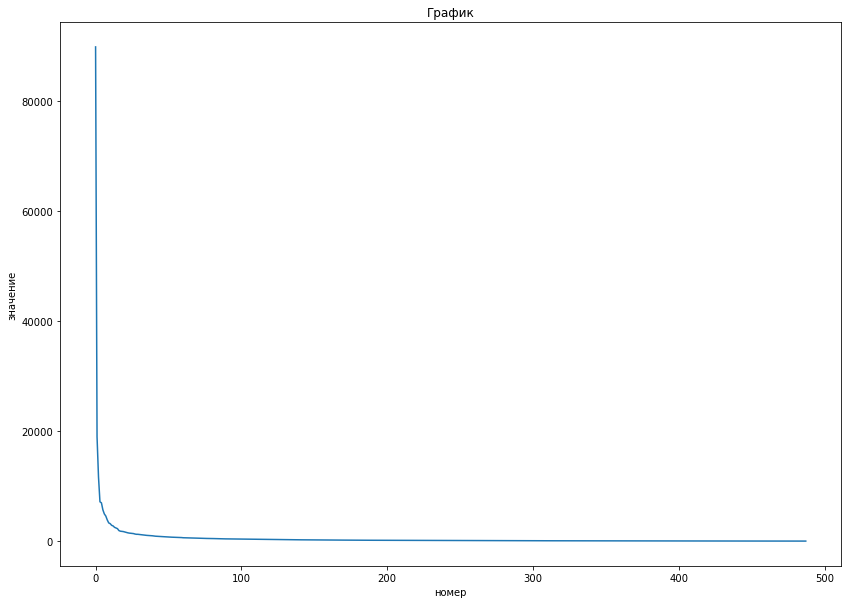

In [4]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
plt.figure(figsize = (14, 10))
plt.plot(S)
plt.ylabel('значениe')
plt.xlabel('номер')
plt.title('График')



Кажется, что они убывают достаточно быстро и есть надежда, что первые несколько компонент дадут картинку, близкую к исходной.

**Важно:** при визуализации различных компонент в этом задании используйте только матричные операции. В частности, избегайте циклов, функций `map` и `reduce`, а также специальных функций, находящих суммы компонент.

**2. [0.1 балла]** Визуализуйте первую компоненту ранга 1. Ожидали ли Вы увидеть именно это? Поясните.

In [5]:
def plot_comps(rank1, rank2, label):
    comp = U[:, rank1:rank2] @ np.diag(S[rank1:rank2]) @ VT[rank1:rank2, :]
    imgplot = plt.imshow(comp, cmap='gray') 
    plt.ylabel('y')
    plt.xlabel('x')
    plt.title(label)

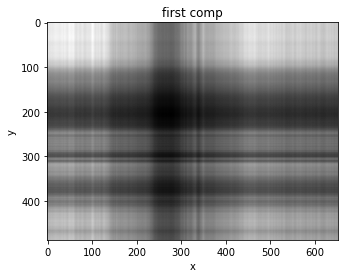

In [6]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
plot_comps(0, 1, "first comp")

Известно: на диагонали в $\Sigma$  элементы в порядке убывания, можно предположить, что значения этих элементов связаны с влиянием компоненты на картинку (т.к. чем элемент больше, тем больше соответствующая компонента влияет на картинку). В целом, основные цветовые пятна совпадают с исходной картинкой. Так что да, картинка ожидаемая. На картинке только горизонтальные/ вертикальные линии, что тоже объяснимо: по идее, каждая компонента должна порождать только такие линии, а при наложении они должны давать четкую крутую картинку.


**3. [0.5 балла]** Визуализуйте суммы компонент ранга 1 с первой по двадцатую, с первой по пятидесятую, с двадцатой по сотую, с двадцатой по последнюю. Сделайте выводы.

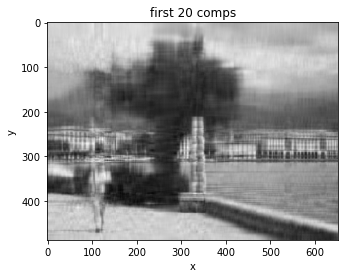

In [7]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
plot_comps(0, 20, "first 20 comps")

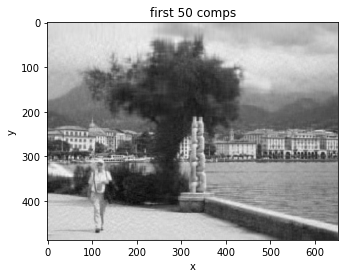

In [8]:
plot_comps(0, 50, "first 50 comps")

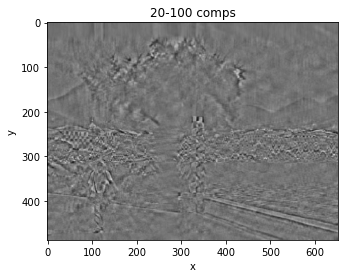

In [9]:
plot_comps(20, 100, "20-100 comps")

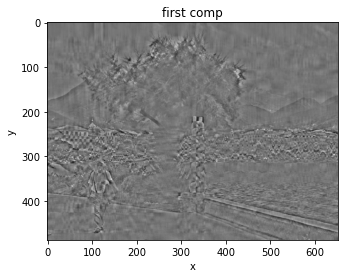

In [10]:
plot_comps(20, S.shape[0], "first comp")

В общем, гипотеза подтвердилась: картинка при использовании первых компонент более похожа на исходную, но не такая четкая. Последние же компоненты дают некоторую "маску", при наложении которой картинка должна быть более четкая

**Ну вот совсем вывод**
Для понимания того, что происзодит на картинке, нет смысла хранить много данных

**4. [0.35 балла]** Как Вам кажется, какие компоненты нужно взять для достаточно хорошего восстановления исходного изображения? Аргументируйте свой ответ. Не забудьте визуализировать сумму выбранных компонент.

*Комментарий: для получения полного балла за это задания постарайтесь привести более убедительный аргумент, нежели Ваши субъективные впечатления от сравнения полученного изображения с исходным.*

Обобщу вывод из прошлого задания: есди брать мало компонент - картинка получится не очень осмысленная, если брать много - не получится существенной экономии по памяти. Наверное, оптимльное число компонент - больше 50 (чтобы уже получалось что-то омысленное), еще взять сколько-то (но не слишклм много) для четкости. Скажем, для четкости можно взять 25 компонент, тогда итоговый ранг - 75. 

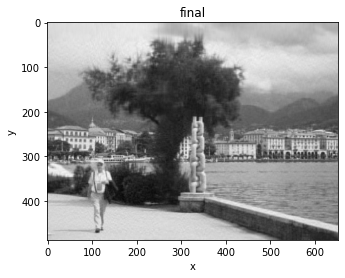

In [11]:
plot_comps(0, 75, "final")

В общем, картинка достаточно четкая, и весить должно мало. 

**5. [0.15 балла]** Во сколько раз меньше памяти (теоретически) потребуется для хранения нового изображения по сравнению с исходным?

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

$$\frac{\text{затрат было}}{\text{затрат стало}} = \frac{n \cdot m}{r(n + m + 1)} = \frac{488 \cdot 653}{75(488+653+1)} = \frac{159332}{42825}
\approx 3.7 \approx 4$$
Итого: примерно в 4 раза (ну, поточнее - в 3.7)

**6. [0.25 балла]** Подсчитайте, сколько в действительности места в памяти компьютера занимают исходная матрица и компоненты её сингулярного разложения. Согласуется ли этот результат с ответом предыдущего пункта? Сделайте выводы.

In [12]:

FINAL_RANK = 75
newU, newS, newVT = U[:, 0:FINAL_RANK], S[0:FINAL_RANK], VT[0:FINAL_RANK, :];
print('было', img.nbytes, 'единиц');
now = newU.nbytes + newS.nbytes + newVT.nbytes
print('стало', now, 'единиц');
print("отношение", img.nbytes/now)

было 2549312 единиц
стало 685200 единиц
отношение 3.7205370694687683


$Xixixi$ все согласуется

### Задание 2. Геометрия SVD. Визуализация данных с помощью SVD

**Геометрический смысл SVD**

Допустим, что у нас есть выборка $x_1,\ldots,x_m\in\mathbb{R}^n$. Запишем её в матрицу объекты-признаки

$$X = \begin{pmatrix}
x_{11} & \ldots & x_{1n}\\
\vdots & & \vdots\\
x_{m1} & \ldots & x_{mn}
\end{pmatrix}$$

(строки — объекты, столбцы — признаки) и сделаем SVD-разложение: $X = U\Sigma V^T$. Его можно интерпретировать следующим образом:

$$X = U\Sigma\cdot V^T,$$

где $U\Sigma$ — это матрица объекты-признаки для тех же объектов, но в новых признаках, полученных из исходных с помощью линейного преобразования $V$ (напоминаем, что умножение на матрицу справа соответствует преобразованию столбцов). Попробуем понять, чем замечательны эти признаки.

Рассмотрим матрицу $X^TX = V\Sigma^2V^T$. Легко видеть, что это матрица Грама системы столбцов матрицы $X$; иными словами, в ней записаны скалярные произведения векторов различных признаков. Из лекций вы знаете, что $\sigma_1^2$, квадрат первого сингулярного числа, это наибольшее собственное значение матрицы $X^TX$, а $v_1$, первый столбец матрицы $V$, — это соответствующий собственный вектор. Можно показать, что

$$\sigma_1 = \mathrm{max}_{w}\frac{|Xw|}{|w|} = \mathrm{max}_{|w| = 1}\left(|Xw|\right).$$

Попробуем осознать физический смысл этой штуки. Напомним, что строки матрицы $X$ — это координаты объектов $x_1,\ldots,x_m$ в пространстве признаков. Произведение $Xw$ — это вектор из значений на тех же самых объектах некоторого нового признака, являющегося линейной комбинацией исходных с коэффициентами $w_1,\ldots,w_n$:

$$Xw = w_1\begin{pmatrix} x_{11}\\ \ldots \\ x_{m1}
\end{pmatrix} + w_2\begin{pmatrix} x_{12}\\ \ldots \\ x_{m2}
\end{pmatrix} + \ldots + w_n\begin{pmatrix} x_{1n}\\ \ldots \\ x_{mn}
\end{pmatrix}$$

Соответственно, $|Xw|^2$ — это квадрат длины вектора, составленного из значений нового признака.

Таким образом, первому сингулярному значению $\sigma_1$ отвечает такой признак, у которого сумма квадратов значений максимальна, то есть признак, принимающий, условно говоря, самые большие значения.

Резюмируя, мы можем сказать, что сингулярное разложение делает следующее:
- находит новый признак (новое направление) вдоль которого "дисперсия"$^1$ максимальна;
- в ортогональной ему плоскости находит признак, вдоль которого "дисперсия" максимальна;
- и так далее.

---
$^1$ настоящая выборочная дисперсия с точностью до числового множителя была бы равна $|Xw - \overline{Xw}|^2$, где $\overline{Xw} = \frac1m\sum_{i=1}^m(Xw)_i$ — среднее значения признака.

**1. [1.25 балла]** Пусть $\sigma_1$ — старшее сингулярное число матрицы $X$ размера $m \times n$. Покажите, что верна цепочка равенств
$$\sigma_1 = \mathrm{max}_{w}\frac{|Xw|}{|w|} = \mathrm{max}_{|w| = 1}~|Xw| = \mathrm{max}_{|u|=|v| = 1}~|u^T Xv|.$$

Что известно на данный момент: $$


Рассмотрим самосопряженный линейный оператор $\varphi$ с матрицей $X^TX$. Из-за симметрии матрицы оператор диагонализуем $\Rightarrow \ \exists$ **(ортонормированный)** базис $e_1, .., e_n$ из собственных векторов. $\Rightarrow w = \alpha_1 e_1 + .. + \alpha_n e_n (w \in \langle e_1, .., e_k \rangle , \ |w|^2 = \alpha^2_1 + ... + \alpha^2_n$ ). А из-за самосопряженности линейного оператора $X^TX = 
\begin{pmatrix} 
\sigma^2_1 & 0 & ... & 0 \\ 
\vdots & \vdots & \ddots & \vdots \\
0 & \sigma^2_2 & ... & 0 \\
0 & 0 & ... & \sigma^2_n \end{pmatrix} $

$X^TXw = \begin{pmatrix} 
\sigma^2_1 & 0 & ... & 0 \\ 
\vdots & \vdots & \ddots & \vdots \\
0 & \sigma^2_2 & ... & 0 \\
0 & 0 & ... & \sigma^2_n \end{pmatrix} \cdot (\alpha_1 e_1 + .. + \alpha_n e_n) = \sigma^2_1\alpha_1 e_1 + .. + \sigma^2_n\alpha_n e_n$

$|Xw|^2 = w^T(X^TXw) = \sigma^2_1\alpha_1 + .. + \sigma^2_n\alpha_n$

По условию $\sigma_1$ - наибольшее значение, тогда $\sigma^2_1|w|^2 \geq |^2|Xw|^2\Leftrightarrow \sigma_1 \geq \frac{|Xw|}{|w|}$

Когда юудет достишаться равенство? Тогда, когда $w$- собственный вектор с собственным значением $\sigma_1$; три первые равенства доказаны. Докажем четвертое: 

$|u^TXv|^2 = (u^TXv)^T u^TXv = v^T X^T u u^T X v =(т.к. |u| = 1) v^T X^T X v = |Xv|^T $

$\Rightarrow \sigma_1 = \mathrm{max}_{w}\frac{|Xw|}{|w|} = \mathrm{max}_{|w| = 1}~|Xw| = \mathrm{max}_{|u|=|v| = 1}~|u^T Xv|$

**2. [0.75 балла]** Рассмотрим матрицу $A = (a_{ij})$ размера $n \times n$, такую что $a_{ij} = \sin i \cdot \cos j$, причём нумерация ведётся с нуля. Найдите $r = \text{rk}A$ (можете считать, что $n > 1$), а также разложение (Compact SVD) $A=U \Sigma V^T$, где $U$ и $V$ — матрицы с ортогональными столбцами размеров $n\times r$ и $r\times n$ соответственно, а $\Sigma = \mathrm{diag}(\sigma_1,\ldots,\sigma_r)$ — диагональная матрица размера $r\times r$, в которой $\sigma_1\geqslant\ldots\geqslant\sigma_r > 0$. 

Сначала найдем ранг: очевидно, что он не больше $n - 1$ (поскольку нулевая (первая?? ну или самая верхняя) строка матрицы точно состоит из нулей (sin(0) = 0, все дела)

Теперь рассмотрим последующие строки: 
$\forall p, m (p \in \{1, .., n - 1\}, m \in \{2, .., n - 1\}) a_{pj} = a_{mj} \cdot \frac{sin(p)}{sin(m)} $, причем числитель никогда не равен нулю. $\Rightarrow$ они линейно зависимы, имеем матрицу ранга 1 (при приведении к усв останется одна ненулевая строка)

Разложение: 
Итак, $rkA = 1 = rk \Sigma = r$. Тогда $\Sigma$ - матрица $1 \times 1$. Тогда $U, V$ - векторы размера $n \times 1, 1 \times n$ соответственно. 

теперь заметим: можно легко подобрать две такие матрицы-столбца $U', V'$), что $A = U'V'T$: 

$$U' = \begin{pmatrix} sin(0) \\ sin(1) \\ \vdots \\ sin(n - 1) \end{pmatrix}, 
V' = \begin{pmatrix} cos(0) \\ cos(1) \\ \vdots \\ cos(n - 1) \end{pmatrix}$$

чтобы предъявить искомое разложение, надо найти $\sigma_1$ и ортонормировать $U', V'$. 

Возьмем $a = |U'| = \sqrt{\sum^{n - 1}_{0} sin(i)^2}, b = |V'| = \sqrt{\sum^{n - 1}_{0} cos(i)^2}$, рассмотрим $\sigma_1 = ab, V = \frac{1}{b}V', U = \frac{1}{a}U'$ 

$\Sigma = (ab) = (\sigma_1)$. Перемножим все:

$\frac{1}{a}\begin{pmatrix} sin(0) \\ sin(1) \\ \vdots \\ sin(n - 1) \end{pmatrix} (ab) \frac{1}{b} \begin{pmatrix} cos(0) \\ cos(1) \\ \vdots \\ cos(n - 1) \end{pmatrix}^T = A$. 




**3. [0.5 балла]** Рассмотрим полное сингулярное разложение $A = U \Sigma V^T$ для матрицы размера $m \times n$, такой что $\text{rk}A=r$. Определим также линейное отображение $\mathcal{A} \colon \mathbb{R}^n \to \mathbb{R}^m$, которое действует умножением на матрицу $A$. Покажите, что $\text{Im}\mathcal{A} = \langle u_1, \ldots, u_r \rangle$, а $\text{Ker}\mathcal{A} = \langle v_{r+1}, \ldots, v_n \rangle$.

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
 $\text{Ker}\mathcal{A} = \langle v_{r+1}, \ldots, v_n \rangle$.


во-первых, матрица $\Sigma$ выглядит как-то так: $$\begin{pmatrix} \sigma_1 & ... & 0 & ... & 0 \\
0 & \ddots & 0 & ...& 0 \\
0 & ... & \sigma_r & ... & 0 \\
0 & ... & 0 & ... & 0 \\
\vdots & \ddots & \vdots & \ddots & \vdots \\
0 & ... & 0 & ... & 0 \end{pmatrix} $$

во-вторых, в матрице $V$ столбцы ортонормированны тогда $V^TV = E \Rightarrow AV = U\Sigma V^TV = U\Sigma = (* , ..., *, 0, ..., 0)$, то есть первые $r$ столбцов заполнены чем-то ненулевым, а столбцы с $r + 1$ по $n$ - нулевые. Тогда более или менее очевидно, что 
 $\text{Ker}\mathcal{A} = \langle v_{r+1}, \ldots, v_n \rangle$.
(потому что векторы $v_1, .., v_n$ - линейно независимы и базис всего пространства) 

$\text{Im}\mathcal{A} = \langle u_1, \ldots, u_r \rangle$


Если векторы $v_{r + 1}, .., v_{n}$ - базис ядра, то образы векторов $v_1, .., v_r$ - базис образа.

Заметим, что по построению $u_i = \frac{Av_i}{c_i} \forall i \in \{1, .., r\} $, гже $c_i$ - ненулевая константа. Тогда $u_i$ - просто константа на образ $v_i$, то есть из векторов $u_1, .., u_r$ тоже можно составить базис образа.  

**4. [0.75 балла]** Рассмотрим матрицу $A$ размера $m \times n$, такую что $m \geqslant n$ и столбцы $A$ линейно независимы. Найдите матрицу $\Sigma$ из полного сингулярного разложения для матрицы $P = A(A^T A)^{-1} A^T$.

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
пусть полное SVD для матрицы $A$ $UBV^T$, а ее сингулярные значения - $\beta_1, .., \beta_n$, при этом, $U, V$ - ортогональные (и как следствие обратимые) матрицы. $n = rkA = rkB \in M_{n}(F) \Rightarrow \exists (B^TB)^{-1}$  

$A(A^T A)^{-1} A^T = UBV^T((UBV^T)^T(UBV^T))^{-1}(UBV^T)^T = 
UBV^T((VB^TU^T)(UBV^T))^{-1}VB^TU^T = 
UBV^T(V(B^TB)V^T)^{-1}VB^TU^T = 
UBV^T((V^T)^{-1}(B^TB)^{-1}V^{-1})VB^TU^T = 
UBV^TV(B^TB)^{-1}V^TVB^TU^T = 
UB(B^TB)^{-1}B^TU^T$

Вспомним, что по условию $m \geqslant n$

$$B(B^TB)^{-1}B^T = \begin{pmatrix}
\beta_1 & 0 & 0 & ... & 0 \\
0 & \beta_2 & 0 & ... & 0 \\
0 & 0 & \beta_3 & ... & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & ... & \beta_n \\
0 & 0 & 0 & ... & 0 \\ 
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & ... & 0 
\end{pmatrix} \cdot \\ \\ \cdot   \left( 
\begin{pmatrix}
\beta_1 & 0 & 0 & ... & 0 & 0 & ... & 0\\
0 & \beta_2 & 0 & ... & 0 & 0 & ... & 0\\
0 & 0 & \beta_3 & ... & 0  & 0 & ... & 0\\
\vdots & \vdots & \vdots & \ddots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & ... & \beta_n & 0 & ... & 0\\
\end{pmatrix}
\begin{pmatrix}
\beta_1 & 0 & 0 & ... & 0 \\
0 & \beta_2 & 0 & ... & 0 \\
0 & 0 & \beta_3 & ... & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & ... & \beta_n \\
0 & 0 & 0 & ... & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & ... & 0 
\end{pmatrix} \right)^{-1} \cdot \\ \\ \cdot 
\begin{pmatrix}
\beta_1 & 0 & 0 & ... & 0 & 0 & ... & 0\\
0 & \beta_2 & 0 & ... & 0 & 0 & ... & 0\\
0 & 0 & \beta_3 & ... & 0  & 0 & ... & 0\\
\vdots & \vdots & \vdots & \ddots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & ... & \beta_n & 0 & ... & 0\\
\end{pmatrix} = \\ \\
= 
\begin{pmatrix}
\beta_1 & 0 & 0 & ... & 0 \\
0 & \beta_2 & 0 & ... & 0 \\
0 & 0 & \beta_3 & ... & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & ... & \beta_n \\
0 & 0 & 0 & ... & 0 \\ 
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & ... & 0 
\end{pmatrix} \cdot    \left( 
\begin{pmatrix}
\beta^2_1 & 0 & 0 & ... & 0 \\
0 & \beta^2_2 & 0 & ... & 0 \\
0 & 0 & \beta^2_3 & ... & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & ... & \beta^2_n \\
\end{pmatrix}
 \right)^{-1} \cdot \\ \\ \cdot 
\begin{pmatrix}
\beta_1 & 0 & 0 & ... & 0 & 0 & ... & 0\\
0 & \beta_2 & 0 & ... & 0 & 0 & ... & 0\\
0 & 0 & \beta_3 & ... & 0  & 0 & ... & 0\\
\vdots & \vdots & \vdots & \ddots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & ... & \beta_n & 0 & ... & 0\\
\end{pmatrix} 
= \\ \\ = 
\begin{pmatrix}
\beta_1 & 0 & 0 & ... & 0 \\
0 & \beta_2 & 0 & ... & 0 \\
0 & 0 & \beta_3 & ... & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & ... & \beta_n \\
0 & 0 & 0 & ... & 0 \\ 
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & ... & 0 
\end{pmatrix} \cdot 
\begin{pmatrix}
\beta^{-2}_1 & 0 & 0 & ... & 0 \\
0 & \beta^{-2}_2 & 0 & ... & 0 \\
0 & 0 & \beta^{-2}_3 & ... & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & ... & \beta^{-2}_n \\
\end{pmatrix}
 \cdot \\ \\ \cdot 
\begin{pmatrix}
\beta_1 & 0 & 0 & ... & 0 & 0 & ... & 0\\
0 & \beta_2 & 0 & ... & 0 & 0 & ... & 0\\
0 & 0 & \beta_3 & ... & 0  & 0 & ... & 0\\
\vdots & \vdots & \vdots & \ddots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & ... & \beta_n & 0 & ... & 0\\
\end{pmatrix} 
= \\ \\ = 
\begin{pmatrix}
1 & 0 & 0 & ... & 0 & 0 & ... & 0 \\
0 & 1 & 0 & ... & 0 & 0 & ... & 0 \\
0 & 0 & 1 & ... & 0 & 0 & ... & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots & \vdots & \ddots & \vdots  \\
0 & 0 & 0 & ... & 1 & 0 & ... & 0 \\
0 & 0 & 0 & ... & 0 & 0 & ... & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots & \vdots & \ddots & \vdots  \\
0 & 0 & 0 & ... & 0 & 0 & ... & 0 
\end{pmatrix} = \Sigma$$

Получилась диагональная матрица, элементы на диагонали по неубыванию. Тогда это и будет $\Sigma$

**Визуализация данных с помощью SVD**

Выше мы обсудили, что первые из "новых" признаков — это признаки, значения которых, скажем так, наиболее разнообразны. Зачастую (хотя и не всегда) именно они несут в себе наиболее важные черты датасета. И если взять два-три первых, то датасет можно нарисовать и посмотреть на него — и, возможно, обнаружить какую-то структуру.

С помощью функции `dsklearn.datasets.load_digits()` загрузите датасет рукописных цифр [MNIST](http://yann.lecun.com/exdb/mnist/). В нём есть несколько атрибутов; вам сейчас будут нужны `digits.data` (`np.array`, строки которого — это вытянутые в одну строку значения пикселей) и `digits.target` (в них записаны соответствующие цифры).

0


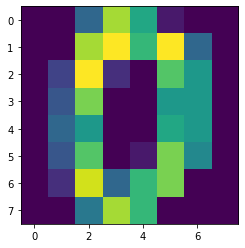

In [13]:
from sklearn import datasets

digits = datasets.load_digits()

print(digits.target[0])

plt.imshow(digits.data[0].reshape((8,8)))

**5. [0.1 балла]** Примените к матрице `digits.data` сингулярное разложение.

In [14]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

svd_U1, svd_S1, svd_VT1 = svd(digits.data, full_matrices=False)

**6. [0.65 балла]** Визуализируйте данные, спроецировав их на такую плоскость, чтобы координаты точек соответствовали первым двум новым признакам. Не забудьте покрасить точки, отвечающие различным цифрам, в разные цвета (если Вы любите красивые визуализации, разберитесь, как вместо точек рисовать маленькие цифры).

In [15]:
colors = [ "gray", "lightcoral", "salmon", "sandybrown", 
          "darkkhaki", "forestgreen", "mediumturquoise", 
          "steelblue", "plum", "lightpink"]



In [16]:
def svd_plot(to_plot, title):
    plt.title(title)
    for i in range(to_plot.shape[0]):
        plt.scatter(to_plot[i, 0], to_plot[i, 1] , color = colors[digits.target[i]])

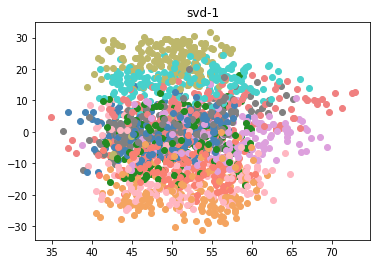

In [17]:
svd_plot1 = svd_U1 @ np.diag(svd_S1)
svd_plot1 = svd_plot1[:, [0, 1]]
svd_plot(svd_plot1, "svd-1")

**7. [0.25 балла]** Теперь вычтите из каждого признака его среднее значение, снова сделайте SVD и нарисуйте разноцветные точки.

In [18]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
data = digits.data - np.mean(digits.data, axis = 0, keepdims = True)
svd_U2, svd_S2, svd_VT2 = svd(data, full_matrices = False)


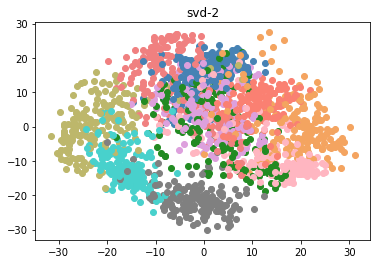

In [19]:
svd_plot2 = svd_U2 @ np.diag(svd_S2)
svd_plot2 = svd_plot2[:, [0, 1]]
svd_plot(svd_plot2, "svd-2")

**8. [0.25 балла]** Сравните выполненные Вами в двух предыдущих пунктах визуализации. Чем последняя выгодно отличается от первой?

В первом случае видим кашу из точек, во втором - точки собрались по группам по цвету, точка 0 оказалась в центре на второй картинке, более того, модули координат уменьшились (по модулю они все теперь не превосходят 30, а раньше было 70, это, вроде, плюс при работе с данными)

**9. [1 балл]** Сравните работу SVD с другим методом понижения размерности: [случайными гауссовскими проекциями](http://scikit-learn.org/stable/modules/generated/sklearn.random_projection.GaussianRandomProjection.html).

*Комментарий: Эксперименты без выводов, объясняющих полученные результаты, не оцениваются. Для получения полного балла за этот пункт постарайтесь провести как можно больше разноплановых экспериментов.*

In [20]:
from sklearn.random_projection import GaussianRandomProjection as grp

grp_obj = grp(np.shape(digits.data)[1])

Сделаем сначала примерно то же самое, что и с SVD делали (не вычитаем средние значения признаков, а просто рисуем): 

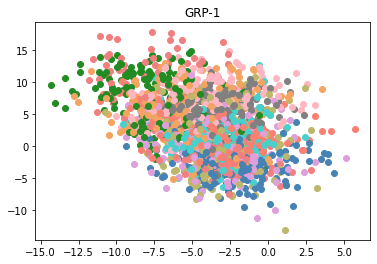

In [21]:
grp_plot1 = grp_obj.fit_transform(digits.data)
svd_plot(grp_plot1, "GRP-1")

Теперь вычтем среднее (как в фрагменте где получилось SVD_2)

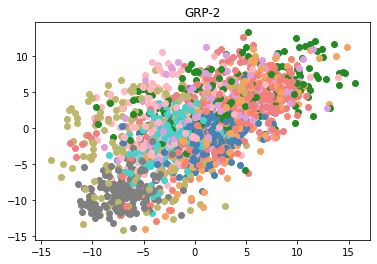

In [22]:
grp_plot2 = grp_obj.fit_transform(data)
svd_plot(grp_plot2, "GRP-2")

А вот тут попробуем применить гауссовы проекции не просто к данным, но еще и к полю target.
Идейно должно получиться получше:

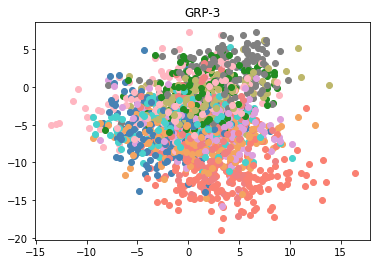

In [23]:
grp_plot3 = grp_obj.fit_transform(digits.data, digits.target)
svd_plot(grp_plot3, "GRP-3")

ну и наконец все то же самое, но вычитаем средние

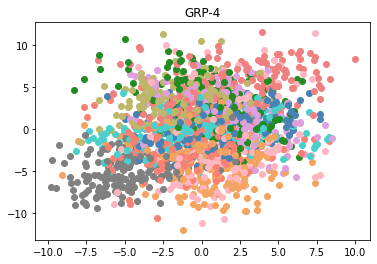

In [24]:
grp_plot4 = grp_obj.fit_transform(data, digits.target)
svd_plot(grp_plot4, "GRP-4")

**Вывод**

И в простом случае SVD, и в простом случае GRP, вычитание среднего всегда дулает картинку лучше: одинаковые цифры больше "кучкуются", разброс значений меньше. На картинке с SVD видим еще нееоторую пустоту около нуля. 

Теперь рассмотрим сложный случай GRP (ну то есть, когда мы в fit_transform еще и target пихали). Данные, опять же, собираются вместе еще больше, и, опять же, ситуация с вычетом средних лучше ситуации без вычета средних. 

Теперь сравним SVD с вычетом средних, GRP без target'а, GRP с ним (как уже объяснено, такие ситуации лучше, чем аналогичные но без вычета средних): 

Как будто, и на SVD и на GRP+target цифры больше собраны в кучки, чем на простом GRP, но на GRP еще нет пустоты вокруг нуля

### Задание 3. Когда SVD не сработает

**Disclaimer**

Цель этого задания — познакомить Вас не только с геометрическим смыслом сингулярного разложения, но и перекинуть очередной мостик между линейной алгеброй и анализом данных. К сожалению, на том берегу Вас встретят разные пока неизведанные понятия; мы постараемся по возможности дать какие-то определения, но, конечно, нет никакой возможности изложить на этих страницах полный курс теории вероятностей. Поэтому какие-то вещи останутся недосказанными или необоснованными; если Вам будет интересно, не стесняйтесь читать соответствующую литературу или хотя бы Википедию, а если нет, то мы надеемся, что хотя бы наглядное представление у Вас сформируется. В любом случае, нам хотелось бы, чтобы воспоминания об этом всколыхнулись в ваших головах, когда Вы будете это всё изучать в курсе по теории вероятностей.

Но начнём мы с того, что обсудим ситуацию, в которой SVD работает лучше всего: а именно, со случая, когда данные распределены нормально.

**Что такое плотность вероятности**

В дальнейшем Вам достаточно часто придётся сталкиваться со *случайными величинами*. Мы не будем сейчас пытаться строго определить, что это такое (для этого у вас будет целый курс по теории вероятностей), а остановимся только на одном его аспекте.

Если случайная величина $X$ принимает лишь конечное (или счётное) число значений $x_1,x_2,\ldots$, то чтобы задать её, достаточно описать, с какой вероятностью $X$ равна $x_i$: 

$$p_i = P(X = x_i)$$

таким образом, чтобы $\sum_ip_i = 1$. Если же $X$ принимает значения на каком-либо отрезке или на всей числовой прямой, то так уже не получится: в этом случае вероятность того, что $X$ равна какому-то конкретному $x_0$, обычно равна нулю. Как правило, заменой вероятностей $p_i$ служит *функция плотности распределения* $p(x)$. Смысл её таков:

$$P(\alpha\leqslant X\leqslant\beta) = \int\limits_{\alpha}^{\beta}p(x)dx$$

(в левой части стоит вероятность того, что значение $X$ лежит на отрезке $[\alpha,\beta]$).

Таким образом, функция $p(x)$ действительно играет роль "плотности": вероятность попасть в отрезок одной и той же длины тем выше, чем больше значения $p(x)$ на нём.

**Нормальное распределение**

Одним из самых важных примеров непрерывных распределений является *нормальное распределение*. Его плотность имеет вид

$$p(x) = \frac1{\sqrt{2\pi\sigma^2}}e^{-\frac{(x - a)^2}{2\sigma^2}}$$

У него есть два параметра:

- $a$ - *математическое ожидание*, имеющее смысл среднего значения и для нормального распределения совпадающее с центром симметрии распределения;
- $\sigma^2$ - *дисперсия*: чем она меньше, тем в большей степени распределение сконцентрировано подле своего математического ожидания

Нормальное распределение с параметрами $a$ и $\sigma^2$ можно кратко обозначать $\mathcal{N}(a, \sigma^2)$.

Чтобы проиллюстрировать это, я сгененерирую много точек из распределений $\mathcal{N}(2, 0.25)$, $\mathcal{N}(0, 1)$ и $\mathcal{N}(0, 4)$ и по ним в каждом из этих случаев построю аппроксимацию функции плотности распределения. Обратите внимание, что параметр $a$ в `numpy` называется `loc`, $\sigma$ (без квадрата!) — `scale`.

In [25]:
import numpy as np
from scipy.interpolate import UnivariateSpline
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

/home/dashsh/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/dashsh/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/dashsh/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with simil

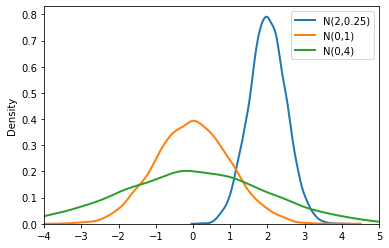

In [26]:
N = 10000
plt.xlim([-4,5])
s = np.random.normal(loc=2, scale=0.5, size=N)   # generate your data sample with N elements
sns.distplot(s, hist=False, kde=True, 
             bins=50,
             kde_kws={'linewidth': 2}, label='N(2,0.25)')

s = np.random.normal(loc=0, scale=1, size=N)   # generate your data sample with N elements
sns.distplot(s, hist=False, kde=True, 
             bins=50,
             kde_kws={'linewidth': 2}, label='N(0,1)')

s = np.random.normal(loc=0, scale=2, size=N)   # generate your data sample with N elements
sns.distplot(s, hist=False, kde=True, 
             bins=50,# color = 'darkblue',
             kde_kws={'linewidth': 2}, label='N(0,4)')

plt.legend()
plt.show()

**Функция плотности распределения в многомерном случае**

Если значения случайной величины $X$ — это многомерные векторы, функция плотности сохраняет примерно тот же смысл: если $\Omega\subseteq\mathbb{R}^n$, то

$$P(X\in\Omega) = \int\limits_{\Omega}p(x)dx$$

**Многомерное нормальное распределение**

Многомерное нормальное распределение определяется также двумя параметрами: *вектором средних* $a$ и положительно определённой *ковариационной матрицей* $\Sigma$; оно имеет плотность

$$p(x) = \frac1{(2\pi)^{n/2}|\Sigma|^{1/2}}e^{-\frac12(x - a)^T\Sigma^{-1}(x - a)}$$

где, напомним, $x$ — вектор из $\mathbb{R}^n$. Компоненты вектора $a$ — это математические ожидания отдельных координат $X$, а на диагонали матрицы $\Sigma$ стоят их *дисперсии* (настоящие, без кавычек). Вне диагонали стоят *ковариации* компонент $X$ (пока вам достаточно понимать, что если они равны нулю, то эти компоненты независимы$^1$).

---
$^1$ Точнее сказать, некоррелированны, однако для компонент многомерного нормального распределения независимость и некоррелированность равносильны (на самом деле редкое и удачное свойство!).

**1. [1.5 балла]** Под (n-1)-мерным эллипсоидом будем понимать гиперповерхность в $\mathbb{R}^n$, такую что в некоторой прямоугольной декартовой системе координат её уравнение принимает вид $\sum_{i=1}^n \frac{x_i^2}{r_i^2} = 1$. Докажите, что поверхности уровня $p(x) = c$ — это эллипсоиды.

Имеем: $$c = p(x) =  \frac1{(2\pi)^{n/2}|\Sigma|^{1/2}}e^{-\frac12(x - a)^T\Sigma^{-1}(x - a)} \overset{\text{в знаменателе ненулевая константа}}{\Longleftrightarrow} \\ \\ \Longleftrightarrow
c(2\pi)^{n/2}|\Sigma|^{1/2} = e^{-\frac12(x - a)^T\Sigma^{-1}(x - a)} \Longleftrightarrow \\ \\ \Longleftrightarrow 
ln(c(2\pi)^{n/2}|\Sigma|^{1/2}) = -\frac12(x - a)^T\Sigma^{-1}(x - a) \Longleftrightarrow \\ \\ \Longleftrightarrow
\underbrace{-2ln(c(2\pi)^{n/2}|\Sigma|^{1/2})}_{const, \text{ обозн. } \alpha} = \underbrace{\underbrace{(x - a)^T\Sigma^{-1}}_{\text{строка (1)}}(x - a) }_{(2)}
$$

Пусть в $(x - a)^T$ элементы $y_{i}$, а в $\Sigma:{-1}$ (на диагонали, другие нулевые) элементы $c_i$

(1) - строка вида $\begin{pmatrix}c_1y_1 & ... & c_ny_n \end{pmatrix}$

(2) - выражение вида $c_1y^2_1 + ... + c_ny^2_n$


Получаем уравнене эллипсоида: 
$$\alpha = \Sigma^n_{i = 1}c_iy^2_i  \Leftrightarrow 
\Sigma^n_{i = 1}\frac{c_iy^2_i}{\alpha} = 1 \Leftrightarrow 
\Sigma^n_{i = 1}\frac{y^2_i}{r_i} = 1, r_i = \frac{\alpha}{c_i}
$$


**2. [1.5 балла]** Пользуясь теоремой о приведении квадратичной формы к главным осям, докажите, что функцию плотности многомерного нормального распределения можно представить в виде произведения одномерных нормальных плотностей. В частности, это означает, что с помощью замены координат можно добиться того, чтобы отдельные компоненты были независимы.

Имеем $(x - a)^T\Sigma^{-1}(x - a) = c_1y^2_1 + ... + c_ny^2_n$, причем $c_i = \frac{1}{\sigma^2_i}, y_i = (x_i - a)$

$p(x) =  \frac1{(2\pi)^{n/2}|\Sigma|^{1/2}}e^{-\frac12(x - a)^T\Sigma^{-1}(x - a)} =  \frac1{(2\pi)^{n/2}|\Sigma|^{1/2}}e^{-\frac12\Sigma^{n}_{i = 1}c_iy^2_i}$

Рассмотрим знаменатель: из-за диагональности $\Sigma
$ имеем:

$(2\pi)^{n/2}|\Sigma|^{1/2} = (\sqrt{2\pi})^{n}|\Sigma|^{1/2} = (\sqrt{2\pi})^{n}(\prod^n_{i = 1}(\sigma_i))^{1/2} =  
      \prod_{i = 1}^{n} (\sqrt{2\pi\sigma_i}) $

Рассмотрим числитель: 

$e^{-\frac12\Sigma^{n}_{i = 1}c_iy^2_i} = \prod^n_{i = 1}e^{c_iy^2_i}$

Итого: 
$p(x) = \frac{\prod^n_{i = 1}e^{c_iy^2_i}}{ \prod_{i = 1}^{n} (\sqrt{2\pi\sigma_i}} = \prod^{n}_{i = 1}\frac{e^{c_iy^2_i}}{(\sqrt{2\pi\sigma_i}}$

Выполнив соответствующие замены, получим произведение одномерных нормальных плотностей

А мы тем временем продемонстрируем это на конкретном примере, сгенерировав много точек из двумерного нормального распределения с вектором средних $(-1,3)$ и ковариационной матрицей

$$\begin{pmatrix}
1 & \frac32\\
\frac32 & 5
\end{pmatrix}$$

и нарисовав приближённо линии уровня функции плотности.

/home/dashsh/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

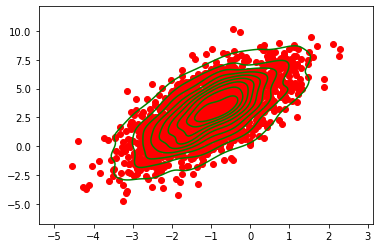

In [27]:
import seaborn as sns
import numpy as np

N = 2000
s = np.random.multivariate_normal(mean=np.array([-1,3]), cov=np.array([[1,1.5],[1.5,5]]), size=N)
plt.scatter(s[:,0], s[:,1], color='red')
sns.kdeplot(s[:, 0], s[:, 1], color='g')

Как видите, линии уровня весьма напоминают эллипсы (только напоминают, потому что точек у нас всё-таки конечное число).

**3. [0 баллов]** Сгенерируйте выборку из 1000 точек $x_1,\ldots,x_{1000}$ из нормального распределения с вектором средних $a = (0,0)$ и ковариационной матрицей

$$\Sigma = \begin{pmatrix}
1 & -2\\
-2 & 5
\end{pmatrix}.$$

In [28]:
n = 1000
a = np.array([0, 0])
Sigma = np.array([[1, -2],[-2, 5]])

In [29]:
X = np.random.multivariate_normal(mean=a, cov=Sigma, size=n) 

**4. [0.25 балла]** Сделайте SVD-разложение $X = U\Sigma V^T$. Нарисуйте на плоскости все точки $x_i$ и направления новых признаков. Убедитесь, что направления новых признаков примерно совпадают с направлениями полуосей эллипса, образованного точками.

In [30]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
new_U, new_S, new_VT = svd(X, full_matrices = False)

/home/dashsh/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


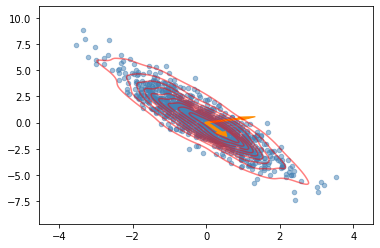

In [31]:
plt.scatter(X[:,0], X[:,1], color='steelblue', alpha=0.5, s =20)
sns.kdeplot(X[:, 0], X[:, 1], shade=False, color='red', alpha = 0.5)
plt.arrow(0, 0, new_VT[0, 0], new_VT[0, 1],color = 'darkorange',  width = 0.1)
plt.arrow(0, 0, new_VT[1, 0], new_VT[1, 1],color = 'darkorange',  width = 0.1)


**5. [0.5 балла]** Приведите к главным осям матрицу ковариации (это нужно сделать без привлечения `Python`) и убедитесь, что направления этих осей тоже примерно совпадают с наблюдаемыми направлениями полуосей эллипсоида.

$ \chi_{A}(\lambda) = (1 - \lambda)(5 - \lambda) - (-2)(-2) = \lambda^{2} - 6\lambda + 5 - 4 = \lambda^{2} - 6\lambda + 1 = (\lambda - (3 + 2\sqrt{2}))(\lambda - (3 - 2\sqrt{2})) $. 

Нашли собственные значения. Ищем собственные векторы: 

$E - \lambda_1E = \begin{pmatrix}
1 - 3 - 2\sqrt{2} & -2\\
-2 & 5 - 3  -2\sqrt{2}
\end{pmatrix} \Rightarrow v_1 = \begin{pmatrix} 1 + \sqrt{2} \\ 1 \end{pmatrix} $

$E - \lambda_2E = \begin{pmatrix}
1 - 3 + 2\sqrt{2} & -2\\
-2 & 5 - 3  + 2\sqrt{2}
\end{pmatrix} \Rightarrow v_2 = \begin{pmatrix} 1 - \sqrt{2} \\ 1 \end{pmatrix} $

Так как от нормирования вектора направление не меняется, направлениям главных осей соответствуют и эти (ортогональные) векторы и их ортонормированнные прототипы

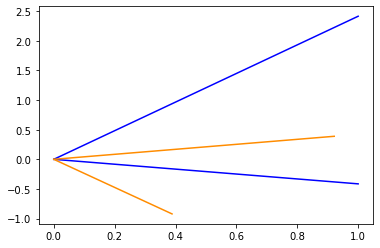

In [32]:
plt.plot([0, 1], [0, 2**0.5 + 1], color = 'blue')
plt.plot([0, 1], [0, -2**0.5 + 1], color = 'blue')
plt.plot([0, new_VT[0, 0]], [0,new_VT[0, 1]], color = 'darkorange')
plt.plot([0, new_VT[1, 0]], [0, new_VT[1, 1]], color = 'darkorange')

ну что-то в этом есть....

Как Вы могли убедиться, SVD хорошо справляется со своей работой, когда данные распределены нормально, а в других случаях может давать совсем не такие информативные (или даже не адекватные) результаты.

**6. [0.25 балла]** Сгенерируйте двумерную выборку, представляющую собой два расположенных рядом (см. пример ниже) длинных и узких не пересекающихся эллипса с центрами в точках $(-1,0)$ и $(1,0)$ и с параллельными направлениями полуосей. Иными словами, постарайтесь как можно точнее воспроизвести картинку ниже. 

In [33]:
n = 1000
a1 = np.array([1, 0])
a2 = np.array([-1, 0])
new_Sigma = np.array([[1.2, 1.875],[1.875, 3]])

In [34]:
X1 = np.random.multivariate_normal(mean=a1, cov=new_Sigma, size=n) 
X2 = np.random.multivariate_normal(mean=a2, cov=new_Sigma, size=n)

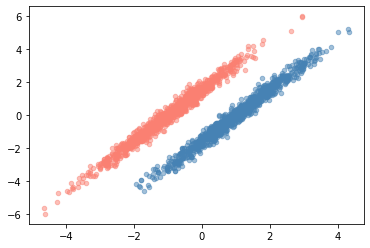

In [35]:
plt.scatter(X1[:,0], X1[:,1], color='steelblue', alpha=0.5, s =20)
plt.scatter(X2[:,0], X2[:,1], color='salmon', alpha=0.5, s =20)


**7. [0.1 балла]** Сделайте SVD и нарисуйте направления новых признаков.

In [36]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
pU, pS, pV = svd(np.concatenate((X1, X2), axis=0), full_matrices=False)

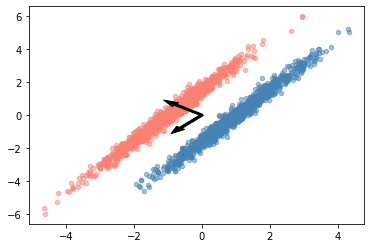

In [37]:
plt.scatter(X1[:,0], X1[:,1], color='steelblue', alpha=0.5, s =20)
plt.scatter(X2[:,0], X2[:,1], color='salmon', alpha=0.5, s =20)

# sns.kdeplot(X1[:, 0], X1[:, 1], shade=False, color='red', alpha = 0.5)
plt.arrow(0, 0, pV[0, 0], pV[0, 1],color = 'black',  width = 0.1)
plt.arrow(0, 0, pV[1, 0], pV[1, 1],color = 'black',  width = 0.1)


Если бы мы решали задачу анализа данных, то скорее всего нас интересовал признак, который бы разделял два кластера (в данном случае два эллипса), то есть такая функция $f(x)$, для которой
$$f(x) < c,\ \mbox{если объект $x$ из первого класса}$$
$$f(x) > c,\ \mbox{если объект $x$ из второго класса}$$
для некоторого числа $c$.

**8. [0.25 балла]** Помогает ли какой-нибудь из двух предоставленных SVD признаков обнаружить эту структуру? Обязательно поясните свой ответ.

Вроде, не помогают, так как пока одна из прямых разделяет эллепсы, другая пересекает, но только один..

Хотя, есть некоторая польза от одной из прямых, но, наверное, бывают ф-и, которые получше справятся с поставленной задачей

In [38]:
# Just keep this image as a sample

**9. [0 баллов]** Сгенерируйте выборку из 1000 точек $x_1,\ldots,x_{1000}$ из нормального распределения с вектором средних $a = (1,1)$ и ковариационной матрицей

$$\Sigma = \begin{pmatrix}
1 & 0\\
0 & 4
\end{pmatrix}.$$

In [39]:
n = 1000
a0 = np.array([1, 1])
Sigma0 = np.array([[1, 0],[0, 4]])

X0 = np.random.multivariate_normal(mean=a0, cov=Sigma0, size=n)

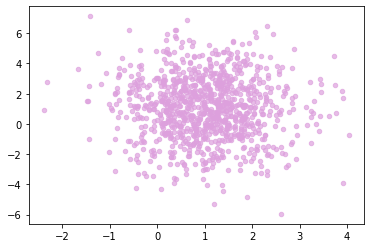

In [40]:
plt.scatter(X0[:,0], X0[:,1], color='plum', alpha=0.7, s =20)


**10. [0.2 балла]** Очевидно, что "интересными" для этого датасета направлениями будут направления полуосей эллипса-облака точек. Глядя только на матрицу $\Sigma$, определите, что это будут за направления? Поясните свой ответ.

Матричка диагональная, построенная по ней квадратичная форма положительно определена, тогда нам нужны направления параллельные осям координат и исходящие из центра 

**11. [0.1 балла]** Сделайте SVD-разложение $X = U\Sigma V^T$. Нарисуйте все точки $x_i$ на плоскости и направления новых признаков.

In [41]:
U0, S0, VT0 = svd(X0, full_matrices=False)

/home/dashsh/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

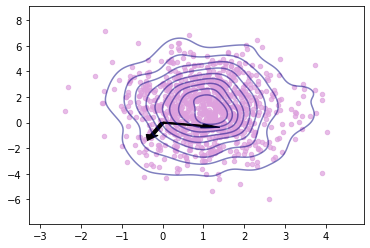

In [42]:
plt.scatter(X0[:,0], X0[:,1], color='plum', alpha=0.7, s =20)
plt.arrow(0, 0, VT0[0, 0], VT0[0, 1],color = 'black',  width = 0.1)
plt.arrow(0, 0, VT0[1, 0], VT0[1, 1],color = 'black',  width = 0.1)
sns.kdeplot(X0[:, 0], X0[:, 1], shade=False, color='navy', alpha = 0.5)


**12. [0.4 балла]** Сделайте вывод: в чём проблема и как можно её исправить?

проблема: из-за смещенности центра облака из нуля картинка не очень анализируемая

решение: сместить центр в 0 перед использованием SVD